## An implementation of the AKS algorithm 
### Credit: Benedict Schlüter
### https://github.com/benschlueter/AKS_PrimeTest


In [61]:
#!/usr/bin/python3

import math
import multiprocessing
from sys import argv
import time


def phi(n):
    amount = 0
    for k in range(1, n + 1):
        if math.gcd(k, n) == 1:
            amount += 1
    return amount


def step1(n):
    for b in range(2, math.floor(math.log2(n) + 1)):
        a = n ** (1 / b)
        if a.is_integer():
            return False
    return True


def step2(n):
    mk = math.floor(math.log2(n) ** 2)
    nexr = True
    r = 1
    while nexr:
        r += 1
        nexr = False
        k = 0
        while k <= mk and not nexr:
            k = k + 1
            if pow(n, k, r) in (0, 1):
                nexr = True
    return r


def step3(n, r):
    for a in range(1, r + 1):
        if 1 < math.gcd(a, n) < n:
            return False
    return True


def step4(n, r):
    if n <= r:
        #print(f"{n} - prime. Step 4")
        return True
    return False



def step5(n, r):
    max_val = math.sqrt(phi(r))
    rn = math.floor(max_val * math.log2(n))
    
    if rn > n:
        rn = n
        
    ran = rn // 8
    if ran == 0:
        ran = 1

    return_dict = {}

    for a in range(0, rn, ran):
        step5_check(n, a, a + ran, return_dict)

    if False not in return_dict.values():
        #print(f"{n} - prime. Step 5")
        return True
    return False

def step5_check(n, bot, top, return_dict):
    x = bot / (top - bot)
    if bot == 0:
        bot = 1
    for a in range(bot, top):
        b = pow(a, n, n)
        if b - a != 0:
            return_dict[x] = False
            return False
    return_dict[x] = True
    return True


def aks(n):
    if step1(n):
        r = step2(n)
        return step3(n, r) and (step4(n, r) or step5(n, r))
    return False


def trivial(n):
    if n == 2:
        return True
    for i in range(2, math.floor(math.sqrt(n)) + 1):
        if n % i == 0:
            return False
    return True






In [11]:
P=1000000007

In [12]:
aks(P)

True

In [5]:
for i in range(1000000,1005000):
    if aks(i)!=trivial(i):
        print("error")

In [6]:
p=100207100213100237100267

In [7]:
aks(p)

True

### Comparre running times

In [25]:
def compute_times_trivial(a,b):
    ans=[]
    for i in range(a,b):
        start=time.time()
        trivial(i)
        end=time.time()
        duration=end-start
        ans.append(duration)
    return ans

In [26]:
def compute_times_aks(a,b):
    ans=[]
    for i in range(a,b):
        start=time.time()
        aks(i)
        end=time.time()
        duration=end-start
        ans.append(duration)
    return ans

In [59]:

def plot_execution_times(a,b):
    y = compute_times_trivial(a,b)
    x = range(a,b)

    # Plot the curve
    plt.plot(x, y,color='red', label='trivial')
    Y = compute_times_aks(a,b)
    X = range(a,b)

    # Plot the curve
    plt.plot(X, Y,color='green', label='AKS')
    # Add title and labels
    plt.title("Execution time for AKS and trivial algorithms")
    plt.xlabel("N")
    plt.ylabel("Time in seconds")
    plt.legend()
    plt.xlim(a,b)

    # Display the plot
    plt.show()


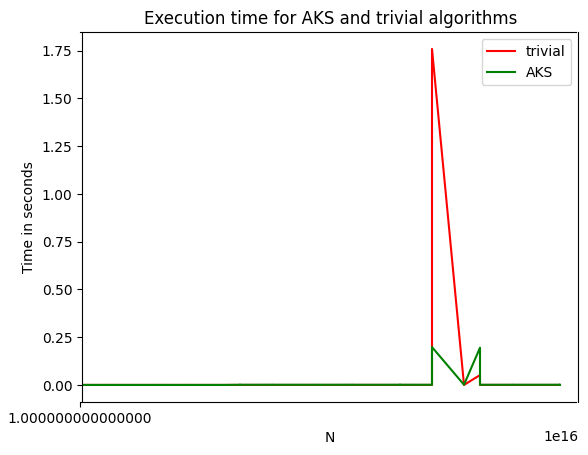

In [60]:
N=10000000000000000
plot_execution_times(N,N+50)